# Plot risk-return perfromance of Norwegian Pension Fund

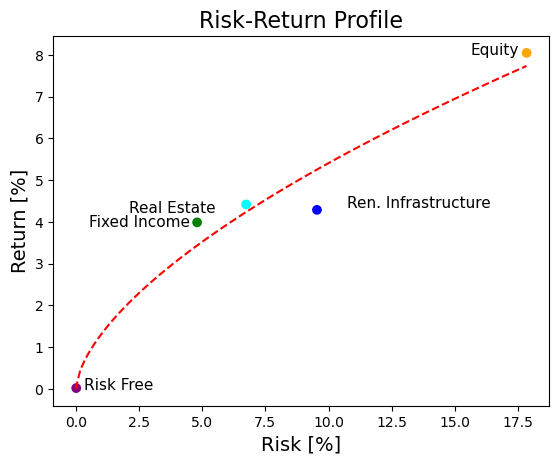

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


# Example data
risk = np.array([0.02, 9.54, 4.80, 6.74, 17.83]) 
returns = np.array([0.02, 4.29, 3.99, 4.42, 8.05])
labels = ["Risk Free", "Ren. Infrastructure", "Fixed Income", "Real Estate", "Equity"]

# Define the power law function
def power_law_func(x, a, b):
    return a * x**b

# Fit the power law function to the data
params, _ = curve_fit(power_law_func, risk, returns, maxfev=10000)
a, b = params

# Generate smooth values for the trendline
smooth_risk = np.linspace(0, max(risk), 100)
smooth_trendline = power_law_func(smooth_risk, a, b)

plt.scatter(risk, returns, color=['purple', 'blue', 'green', 'cyan', 'orange'])

offsets = [
    (0.3, -0.05),  
    (1.2, 0.05),  
    (-0.3, -0.1), 
    (-1.2, -0.2),
    (-0.3, -0.05)      
]

# Plot labels with specified offsets
for i, label in enumerate(labels):
    if i // 2 ==0:
        plt.text(risk[i] + offsets[i][0], returns[i] + offsets[i][1], label, fontsize=11,
                 ha='left')
    else:
        plt.text(risk[i] + offsets[i][0], returns[i] + offsets[i][1], label, fontsize=11,
                 ha='right')
    
# Plot the smooth power law trendline
plt.plot(smooth_risk, smooth_trendline, color='red', linestyle='--', label=f'Power Law Trendline: y = {a:.2f} * x^{b:.2f}')

# Add labels and title
plt.xlabel("Risk [%]", fontsize=14)
plt.ylabel("Return [%]", fontsize=14)
plt.title("Risk-Return Profile", fontsize=16)
#plt.legend()

plt.show()

